In [23]:
import numpy as np
import matplotlib.pyplot as plt 
versicolor_petal_length = [1,5,4,6,5,4,4,4,2]

# Manually calculating variance: 
differences = versicolor_petal_length - np.mean(versicolor_petal_length)
diff_sq = list(map(lambda x: x**2, differences))
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

print(variance_explicit, variance_np)


2.0987654321 2.0987654321


In [6]:
# Standard deviation is the sqrt of the variance 
# Print the square root of the variance
std = np.sqrt(variance_np)
print(std)

# Print the standard deviation
print(np.std(versicolor_petal_length))

1.4487116456
1.4487116456


In [21]:
# Covariance is a measure of correlation 
np.cov([1,2,4,8,16], [2,4,8,16, 16])
# Outputs a covariance matrix of [[var_x, cov], [cov, var_y]]

# Pearson correlation is covariance/(std_x * std_y)
# It is a measure of the ratio of variability due to codependence compared to independent variability. 
def pearson_r(x, y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

r = pearson_r([1,2,4,8,16], [2,4,8,16, 31])
# Print the result

print(r)




0.999861188379


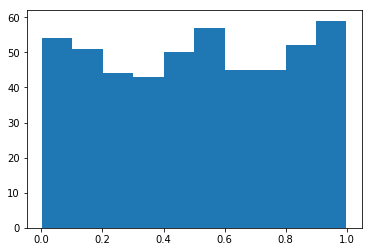

In [30]:
# Bernoulli trial: Has outcome of either true or false 
np.random.seed(43)
random_numbers = np.empty(500)
for i in range(500):
    random_numbers[i] = np.random.random()
_ = plt.hist(random_numbers)
plt.show()


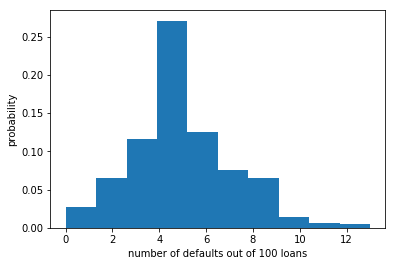

In [34]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0
    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success
perform_bernoulli_trials(5, 0.2)
# Seed random number generator
np.random.seed(41412222)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot

plt.show()